# 用户指南，第13章：更多的music21对象属性
[原文链接](https://web.mit.edu/music21/doc/usersGuide/usersGuide_13_music21object2.html)

TODO

In [1]:
from music21 import *

n = note.Note()
s1 = stream.Stream(id='s1')
s2 = stream.Stream(id='s2')
s1.insert(10, n)
s2.insert(20, n)

for s in n.sites:
    print(s, s.elementOffset(n))

<music21.stream.Stream s1> 10.0
<music21.stream.Stream s2> 20.0


In [2]:
c = note.Note('C4')
c.derivation

<Derivation of <music21.note.Note C> from None>

In [3]:
f = c.transpose('P4')
f

<music21.note.Note F>

In [4]:
c.pitch.accidental = pitch.Accidental('sharp')
(c, f)

(<music21.note.Note C#>, <music21.note.Note F>)

In [5]:
f.notehead = 'diamond'
for n in f.derivation.chain():
    n.notehead = 'diamond'

(f.notehead, c.notehead)

('diamond', 'diamond')

In [6]:
n = note.Note('C')
m = stream.Measure()
m.number = 7
m.append(n)
n.measureNumber

7

In [7]:
v = stream.Voice()
n2 = note.Note('D')
v.append(n2)
m.insert(0, v)
n2.measureNumber

7

In [8]:
n3 = note.Note()
n3.measureNumber is None

True

In [9]:
m.insert(0, tempo.MetronomeMark('Allegro', 120))
print (n.quarterLength, n.seconds)

1.0 0.5


In [10]:
n.seconds = 0.6
n.seconds

0.6

In [11]:
n3 = note.Note('E')
n3.seconds

nan

In [12]:
from math import isnan

for el in (n, n2, n3):
    seconds = el.seconds
    if isnan(seconds):
        seconds = 'No information'
    print(el.step, seconds)

C 0.6
D 0.5
E No information


In [13]:
n = note.Note()
s1 = stream.Stream(id='s1')
s1.insert(10, n)
s2 = stream.Stream(id='s2')
s2.insert(20, n)
n.getOffsetBySite(s1)

10.0

In [14]:
n.setOffsetBySite(s1, 15.0)
n.getOffsetBySite(s1)

15.0

In [15]:
s3 = stream.Measure()
n3 = note.Note(type='whole')
s3.append(n3)
rb = bar.Barline()
s3.rightBarline = rb
rb.getOffsetBySite(s3)

4.0

In [16]:
rb.getOffsetBySite(s3, returnSpecial=True)

<OffsetSpecial.AT_END>

In [17]:
n3.duration.type = 'half'
rb.getOffsetBySite(s3)

2.0

In [18]:
bach = corpus.parse('bwv66.6')
lastNote = bach.recurse().getElementsByClass(note.Note).last()
lastNote

<music21.note.Note F#>

In [19]:
lastNote.getContextByClass(stream.Part)

<music21.stream.Part Bass>

In [20]:
lastNote.getContextByClass(key.KeySignature)

<music21.key.Key of f# minor>

In [21]:
lastNote.getContextByClass(meter.TimeSignature)

<music21.meter.TimeSignature 4/4>

In [22]:
gloria = corpus.parse('luca/gloria')
soprano = gloria.parts[0]

lastTimeSignature = None
for n in soprano.recurse().getElementsByClass(note.Note):
    thisTimeSignature = n.getContextByClass(meter.TimeSignature)
    if thisTimeSignature is not lastTimeSignature:
        lastTimeSignature = thisTimeSignature
        print(thisTimeSignature, n.measureNumber)

<music21.meter.TimeSignature 6/8> 1
<music21.meter.TimeSignature 2/4> 28
<music21.meter.TimeSignature 6/8> 80
<music21.meter.TimeSignature 3/4> 110


In [23]:
lastTimeSignature = None
for n in soprano.flatten().notes:
    thisTimeSignature = n.getContextByClass('TimeSignature')
    if thisTimeSignature is not lastTimeSignature:
        lastTimeSignature = thisTimeSignature
        print(thisTimeSignature, n.measureNumber)

<music21.meter.TimeSignature 6/8> 1
<music21.meter.TimeSignature 2/4> 28
<music21.meter.TimeSignature 6/8> 80
<music21.meter.TimeSignature 3/4> 110


In [24]:
for cs in lastNote.contextSites():
    print(cs)

ContextTuple(site=<music21.stream.Measure 9 offset=33.0>, offset=2.0, recurseType='elementsFirst')
ContextTuple(site=<music21.stream.Part Bass>, offset=35.0, recurseType='flatten')
ContextTuple(site=<music21.stream.Score 0x115f6e61b80>, offset=35.0, recurseType='elementsOnly')


In [25]:
lastGloriaNote = soprano.recurse().notes.last()

for ts in lastGloriaNote.getAllContextsByClass(meter.TimeSignature):
    print(ts, ts.measureNumber)

<music21.meter.TimeSignature 3/4> 110
<music21.meter.TimeSignature 6/8> 80
<music21.meter.TimeSignature 2/4> 28
<music21.meter.TimeSignature 6/8> 1


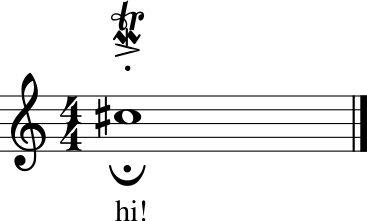

In [26]:
n = note.Note('C#5')
n.duration.type = 'whole'
n.articulations = [articulations.Staccato(), articulations.Accent()]
n.lyric = 'hi!'
n.expressions = [expressions.Mordent(), expressions.Trill(), expressions.Fermata()]
n.show()

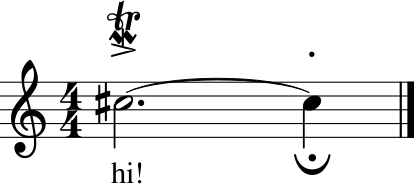

In [27]:
splitTuple = n.splitAtQuarterLength(3.0)
s = stream.Stream()
s.append(splitTuple)
s.show()

In [28]:
splitTuple.spannerList

[<music21.expressions.TrillExtension <music21.note.Note C#><music21.note.Note C#>>]

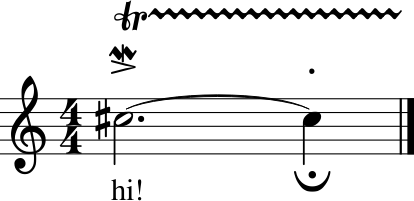

In [29]:
for thisSpanner in splitTuple.spannerList:
    s.insert(0, thisSpanner)
s.show()